In [57]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [58]:
df = pd.read_csv("Resources/Salary_Data_Based_country_and_race.csv")
df.head(10)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


In [59]:
df.value_counts()

Unnamed: 0  Age   Gender  Education Level    Job Title                  Years of Experience  Salary    Country    Race      
0           32.0  Male    Bachelor's         Software Engineer          5.0                  90000.0   UK         White         1
4503        28.0  Female  Bachelor's Degree  Junior Software Developer  2.0                  37000.0   Australia  Asian         1
4475        38.0  Male    Bachelor's Degree  Operations Manager         11.0                 119000.0  Canada     Asian         1
4474        44.0  Female  PhD                Data Scientist             18.0                 183000.0  Australia  Asian         1
4473        28.0  Female  Bachelor's Degree  Junior Software Developer  2.0                  37000.0   Australia  Australian    1
                                                                                                                               ..
2233        34.0  Male    Master's Degree    Back end Developer         8.0                  14

In [60]:
df2 = df.drop(columns=["Unnamed: 0"])

df2 = df2.dropna()

In [61]:
df2.value_counts()

Age   Gender  Education Level    Job Title                  Years of Experience  Salary    Country    Race            
26.0  Male    Bachelor's         Data Analyst               3.0                  130000.0  Australia  Australian          8
32.0  Male    Bachelor's         Software Engineer          8.0                  190000.0  UK         Asian               7
27.0  Male    Bachelor's Degree  Software Engineer          3.0                  80000.0   Australia  Asian               6
                                                                                           Canada     Black               6
40.0  Female  Bachelor's Degree  Financial Manager          16.0                 215000.0  China      White               6
                                                                                                                         ..
30.0  Female  PhD                Data Scientist             7.0                  170000.0  UK         Asian               1
             

In [62]:
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


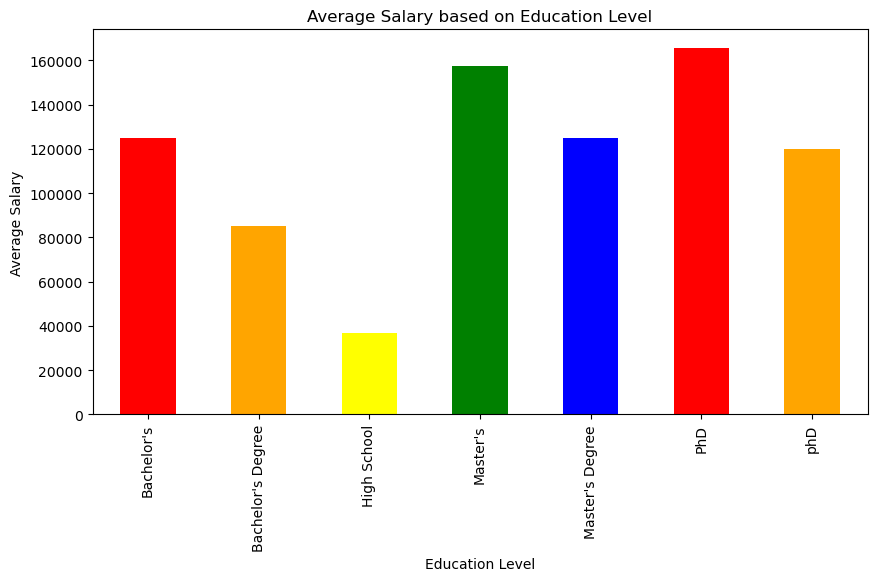

In [63]:
income_edu = df2.groupby(["Education Level"])["Salary"].agg('mean')
ax = income_edu.plot(kind = "bar", color=['red', 'orange', 'yellow', 'green', 'blue'])
ax.set_ylabel('Average Salary')
ax.set_xlabel("Education Level")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Salary based on Education Level')
plt.show()


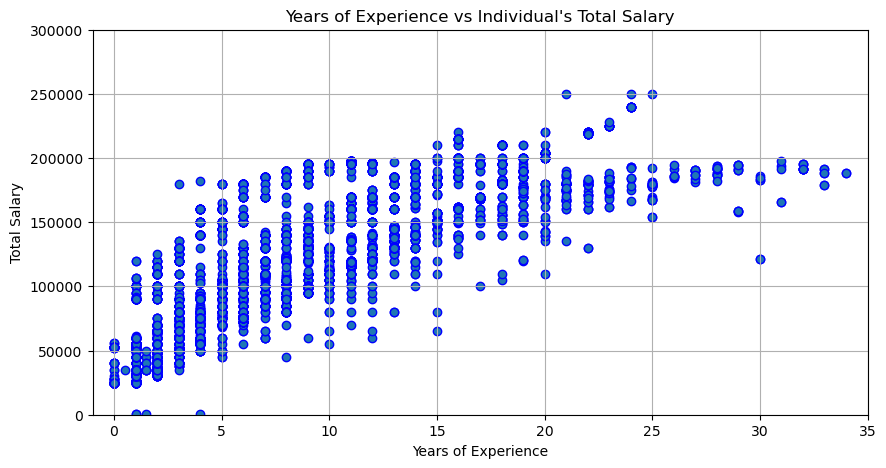

In [64]:
plt.scatter(df2["Years of Experience"], df2["Salary"], edgecolors= "b")

#Graph Properties
plt.title("Years of Experience vs Individual's Total Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Total Salary")
plt.xlim(-1,35)
plt.ylim(0,300000)
plt.grid(True)

plt.show()

The r-value is: 0.6544294992867405


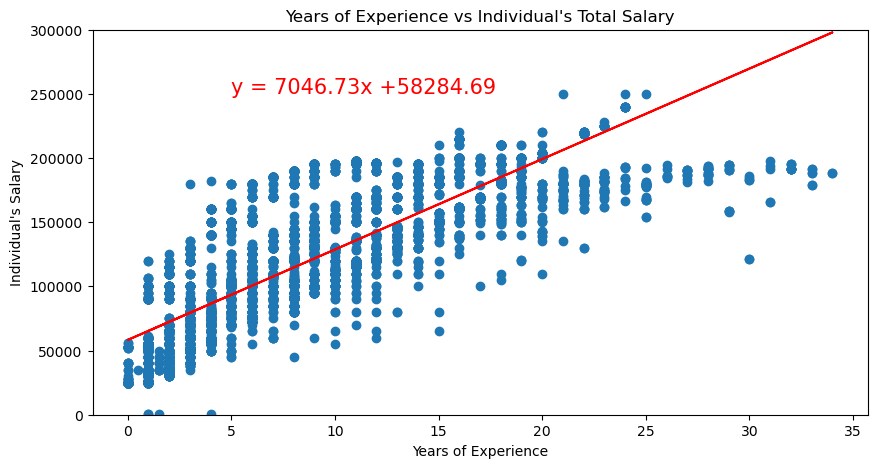

In [72]:
x_values = df2["Years of Experience"]
y_values = df2["Salary"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

plt.ylim(0,300000)
plt.title("Years of Experience vs Individual's Total Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Individual's Salary")
plt.annotate(line_eq,(5,250000),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

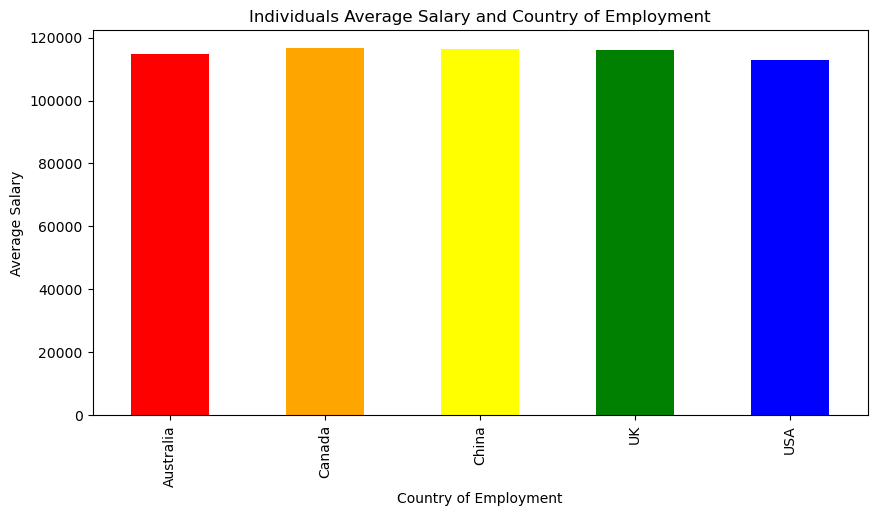

In [73]:
country_salary = df2.groupby(["Country"])["Salary"].agg('mean')
ax = country_salary.plot(kind = "bar", color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
ax.set_ylabel('Average Salary')
ax.set_xlabel("Country of Employment")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Individuals Average Salary and Country of Employment')
plt.show()

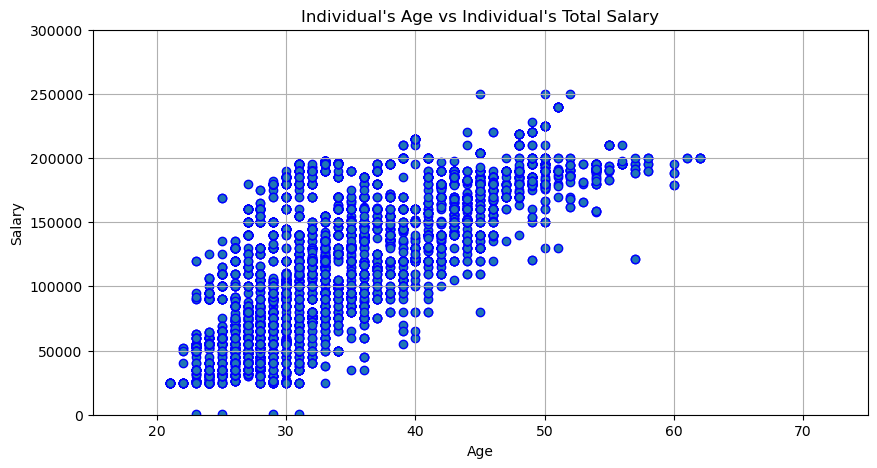

In [74]:
plt.scatter(df2["Age"], df2["Salary"], edgecolors= "b")

#Graph Properties
plt.title("Individual's Age vs Individual's Total Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.xlim(15,75)
plt.ylim(0,300000)
plt.grid(True)

plt.show()

The r-value is: 0.530072280427051


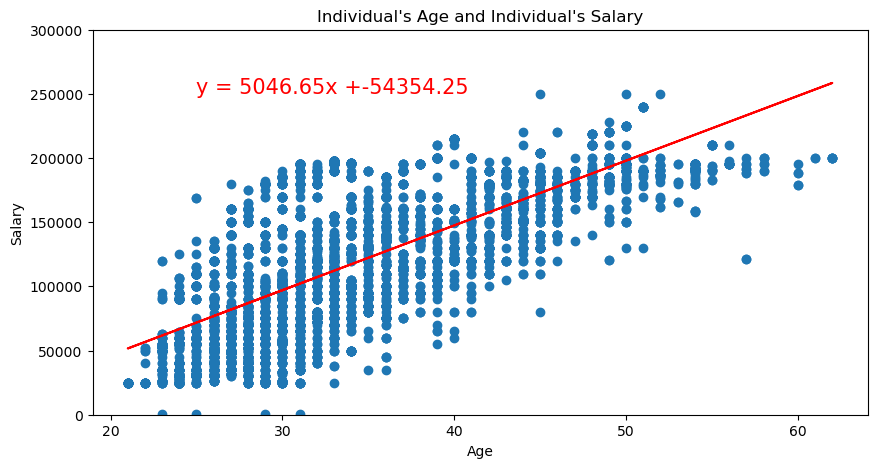

In [75]:
x_values = df2["Age"]
y_values = df2["Salary"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

plt.ylim(0,300000)
plt.title("Individual's Age and Individual's Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.annotate(line_eq,(25,250000),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

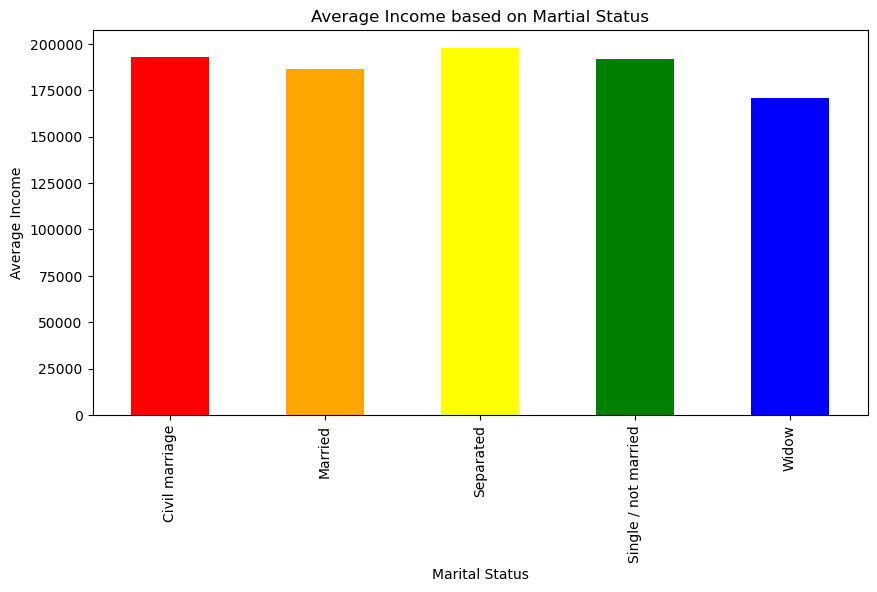

In [37]:
income_edu = df2.groupby(["MARITAL STATUS"])["TOTAL INCOME"].agg('mean')
ax = income_edu.plot(kind = "bar", color=['red', 'orange', 'yellow', 'green', 'blue'])
ax.set_ylabel('Average Income')
ax.set_xlabel("Marital Status")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Income based on Martial Status')
plt.show()